In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_inspection import permutation_importance

In [6]:
data = pd.read_feather('data.feather')
data = data.astype('float64')
data.shape

/home/jeremie/miniconda/envs/nhis/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


(78132, 112)

In [7]:
# drop irrelevent columns
data.drop(columns=['YEAR','SERIAL','NUMPREC','STRATA','PSU','NHISHID','HHWEIGHT','PERNUM',
                   'NHISPID','HHX','FMX','PX','PERWEIGHT','SAMPWEIGHT','FWEIGHT','SUPP1WT',
                   'ASTATFLG','CSTATFLG','FAMNUMR', # irrelevant for prediction
                   'LANY', # categories make no sense
                   ], inplace=True)

In [8]:
# categorical & numerical features
categorical = ['REGION','LIVINGQTR','INTERVWMO','SEX','SEXORIEN','MARSTAT','MARST','MARSTCOHAB',
               'PARENTHERE','RELMOM','MOMED','RELPOP','DADED','RACEA','HISPETH','YRSINUS','USBORN',
               'CITIZEN','RACENEW','INTERVLANG','EDUC','HEADSTAREV','HEADSTARNOW','EMPSTAT',
               'MONTHWRK','USUALFT','EMPSTATWKYR','WORKEV','POORYN','INCFAM07ON','EARNINGS',
               'GOTWELF','GOTNEWELF','GOTSSI','GOTSS','GOTSSDIS','GOTNONSSDIS','GOTDIV','GOTINT',
               'GOTOTHPEN','GOTWAGE','GOTSEMP','GOTCHSUP','GOTSTAMPFAM','OWNERSHIP','LOWRENT',
               'HEALTH','WORKVOLHCSET','WORKVOLHCPAT','NBHDTRUST','PREGNANTNOW','USUALPL','TYPPLSICK',
               'HIUNABLEPAY','HINOTCOVE','ANEMIAYR','CHOLHIGHYR','CRONBRONYR','DIARRHEAYR','EARINFYR',
               'FHEADYR','HYPERTENYR','LIVERCONYR','RALLERGYR','SALLERGYR','SEIZUREYR','ULCERYR',
               'ALCSTAT1','SMOKFREQNOW','CSQTRYYR','MOD10FWK','VIG10FWK','EXERDYR','EXERNOW','DIETDYR',
               'DIETNOW']

numerical = ['AGE','FAMSIZE','FAMKIDNO','FAMOLDNO','HOURSWRK','HRSLEEP']

missing_map = {'REGION': (8,9),
               'LIVINGQTR': (98,),
               'INTERVWMO': (98,),
               'AGE': (99,),
               'SEXORIEN': (0,8),
               'MARSTAT': (0,99),
               'MARST': (0,99),
               'MARSTCOHAB': (9,),
               'FAMSIZE': (0,99),
               'PARENTHERE': (0,98,99),
               'RELMOM': (0,60,97,98,99),
               'MOMED': (0,97,98,99),
               'RELPOP': (0,60,97,98,99),
               'DADED': (0,97,98,99),
               'RACEA': (900,970,980,990),
               'HISPETH': (90,91,92,93,99),
               'YRSINUS': (0,7,8,9),
               'USBORN': (96,97,98,99),
               'CITIZEN': (7,8,9),
               'RACENEW': (97,98,99),
               'INTERVLANG': (8,9),
               'EDUC': (0,997,998,999),
               'HEADSTAREV': (0,7,8,9),
               'HEADSTARNOW': (0,7,8,9),
               'EMPSTAT': (0,90,97,98,99),
               'HOURSWRK': (0,97,98,99),
               'MONTHWRK': (13,90,97,98,99),
               'USUALFT': (0,7,8,9),
               'EMPSTATWKYR': (0,7,8,9),
               'WORKEV': (0,7,8,9),
               'POORYN': (9,),
               'INCFAM07ON': (96,99),
               'EARNINGS': (0,97,98,99),
               'GOTWELF': (0,70,80,90),
               'GOTNEWELF': (0,7,8,9),
               'GOTSSI': (0,70,80,90),
               'GOTSS': (0,70,80,90),
               'GOTSSDIS': (0,97,98,99),
               'GOTNONSSDIS': (0,70,80,90),
               'GOTDIV': (0,70,80,90),
               'GOTINT': (0,70,80,90),
               'GOTOTHPEN': (0,7,8,9),
               'GOTWAGE': (0,7,8,9),
               'GOTSEMP': (0,7,8,9),
               'GOTCHSUP': (7,8,9),
               'GOTSTAMPFAM': (0,70,80,90),
               'OWNERSHIP': (0,97,98,99),
               'LOWRENT': (0,7,8,9),
               'HEALTH': (0,7,8,9),
               'WORKVOLHCSET': (0,7,8,9),
               'WORKVOLHCPAT': (0,7,8,9),
               'NBHDTRUST': (0,7,8,9),
               'PREGNANTNOW': (0,7,8,9),
               'USUALPL': (0,7,8,9),
               'TYPPLSICK': (0,97,98,99),
               'HIUNABLEPAY': (0,7,8,9),
               'HINOTCOVE': (0,7,8,9),
               'ANEMIAYR': (0,7,8,9),
               'CHOLHIGHYR': (0,7,8,9),
               'CRONBRONYR': (0,7,8,9),
               'DIARRHEAYR': (0,7,8,9),
               'EARINFYR': (0,7,8,9),
               'FHEADYR': (0,7,8,9),
               'HYPERTENYR': (0,7,8,9),
               'LIVERCONYR': (0,7,8,9),
               'RALLERGYR': (0,7,8,9),
               'SALLERGYR': (0,7,8,9),
               'SEIZUREYR': (0,7,8,9),
               'ULCERYR': (0,7,8,9),
               'ALCSTAT1': (0,9),
               'SMOKFREQNOW': (0,7,8,9),
               'CSQTRYYR': (0,7,8,9),
               'MOD10FWK': (0,97,98,99),
               'VIG10FWK': (0,97,98,99),
               'EXERDYR': (0,7,8,9),
               'EXERNOW': (0,7,8,9),
               'DIETDYR': (0,7,8,9),
               'DIETNOW': (0,7,8,9),
               'HRSLEEP': (0,25,97,98,99)}

all_features = categorical + numerical

In [9]:
for feature in numerical:
    if feature in missing_map:
        for v in missing_map[feature]:
            data[feature] = data[feature].apply(lambda x: np.nan if x==v else x)

In [10]:
# X
X = data[all_features]

# y
k6 = ['AEFFORT','ASAD','ANERVOUS','ARESTLESS','AHOPELESS','AWORTHLESS']
y = data[k6].sum(axis=1)  # K6 target [0..24]
ybin = (y != 0).astype(int)  # binary target

# keep only in universe samples
mask = np.full((data.shape[0]), True, dtype=bool)
for f in k6:
    for v in (6,7,8,9):
        # 6: not applicable (child or not selected)
        # 7,8,9: missing
        mask = np.logical_and(mask, data[k6][f] != v)

X = X[mask]
y = y[mask]
ybin = ybin[mask]

In [11]:
X.shape

(25767, 82)

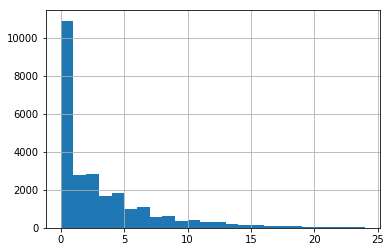

In [12]:
y.hist(bins=24)

In [13]:
ybin.value_counts()

1    14848
0    10919
dtype: int64

In [14]:
# split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, ybin, test_size=0.1, stratify=y, random_state=0)

In [39]:
categ_prepro = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1))])
    #('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))])

num_prepro = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

ct = ColumnTransformer([
    ('categ', categ_prepro, categorical),
    ('num', num_prepro, numerical)])

estimator = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=1)

model = Pipeline(steps=[
    ('prepro', ct),
    ('train', estimator)])

#scoring = 'neg_mean_squared_error'
scoring = 'accuracy'

cross_val_score(model, X_train_b, y_train_b, scoring=scoring, cv=5, error_score='raise')

model.fit(X_train_b, y_train_b)

Pipeline(memory=None,
         steps=[('prepro',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categ',
                                                  Pipeline...                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))])

In [ ]:
pi_test = permutation_importance(model, X_test_b, y_test_b, scoring='accuracy', n_rounds=30)
pim_test = pi_test.mean(axis=-1)

sorted_idx = pim_test.argsort()[-15:]

plt.boxplot(pi_test[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])

In [ ]:
sorted_idx = pim.argsort()[:15]

plt.boxplot(pi_test[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])

In [ ]:
pi_train = permutation_importance(model, X_train_b, y_train_b, scoring='accuracy', n_rounds=30)
pim_train = pi_train.mean(axis=-1)

sorted_idx = pim_train.argsort()[-15:]

plt.boxplot(pi_train[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])

In [ ]:
sorted_idx = pim.argsort()[:15]

plt.boxplot(pi_train[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])